# INF8111 - Fouille de données

## TP2 Automne 2024 - Exploration de données musicales avec clustering

##### Présentation

Les techniques de clustering peuvent être utilisées pour suivre l'évolution de la musique au fil du temps en regroupant les chansons sur la base de leurs caractéristiques audio, telles que le volume sonore, le tempo, le caractère dansant et l'énergie. En divisant un ensemble de données musicales en périodes spécifiques, des groupes peuvent être formés pour chaque période, révélant ainsi les tendances et les changements dans les styles musicaux. Cette approche permet aux chercheurs de saisir et de visualiser la progression des caractéristiques musicales, en découvrant des modèles qui pourraient ne pas être évidents dans le cadre d'une analyse traditionnelle.

Dans ce travail, vous utiliserez des techniques de clustering pour extraire des informations significatives sur la musique au cours des dernières décennies. Enfin, votre objectif est d'utiliser les techniques de regroupement pour construire un système de recommandation pour les utilisateurs qui cherchent des suggestions de nouvelles chansons à écouter. Il est prévu que vous utilisiez les méthodes de regroupement précédentes, mais ne vous y limitez pas. Un degré élevé de créativité dans cette partie sera également récompensé.

Toutes les questions seront évaluées sur la base du code écrit, ainsi que de l'explication écrite des résultats (le cas échéant). Lorsqu'elles ne sont pas explicitement interdites, toutes les bibliothèques Python de base (NumPy, Pandas, Scikit-Learn, etc.) peuvent être utilisées. La créativité du code, l'ajout de commentaires (expliquant chaque étape du code) et la vitesse d'exécution du code auront un impact important sur votre évaluation globale. Une question aura un maximum de points si elle s'exécute sous Windows ou Linux, en montrant le résultat attendu et sans lancer d'exceptions. Si la question n'est pas exécutable sous Windows ou Linux, vous perdrez des points.

## Partie 1 - Construction des méthodes de clustering/Building the Clustering Methods

### Q1 - Chargement des données/Loading Data **(0.5 pt)**

##### Dans ce travail, vous utiliserez l'ensemble de données musicales *TP2_hits*, qui contient diverses caractéristiques des chansons des dernières décennies, telles que les noms des chansons, les noms des artistes et les caractéristiques musicales.

##### Pour commencer votre travail, chargez l'ensemble de données musicales *TP2_hits.csv* et affichez ses 5 premiers résultats.

In [1]:
### CODE
import pandas as pd

df = pd.read_csv('TP2_hits.csv', delimiter=';')
df.head()

,song_name,name_artists,popularity,explicit,song_type,num_artists,num_available_markets,release_date,duration_ms,key,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,"thank u, next",['Ariana Grande'],87,True,Solo,1,79,2019-02-08,207320,1,...,4,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966
1,Without Me,['Halsey'],87,True,Solo,1,79,2018-10-04,201661,6,...,4,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041
2,SICKO MODE,['Travis Scott'],86,True,Solo,1,79,2018-08-03,312820,8,...,4,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008
3,Sunflower - Spider-Man: Into the Spider-Verse,"['Post Malone', 'Swae Lee']",92,False,Collaboration,2,79,2018-12-14,158040,2,...,4,0.55600,0.760,0.479,0.000000,0.0703,-5.574,0.0466,0.913,89.911
4,High Hopes,['Panic! At The Disco'],86,False,Solo,1,78,2018-06-22,190947,5,...,4,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014


### Q2 - Transformer et normaliser les données/Transforming and Normalizing Data **(1 pt)**

##### Lorsque les caractéristiques ont des échelles très différentes, il est important de ramener toutes les valeurs à une échelle commune. Dans cette question, vous devez appliquer les transformations et normalisations nécessaires à l'ensemble de données, en fonction de votre point de vue.

##### Conseil: vous devez supprimer les noms des chansons et des artistes et vous concentrer uniquement sur les caractéristiques numériques.

In [2]:
### CODE
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# POUR Q5
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df = df.drop(columns=['song_name', 'name_artists'])
df['explicit'] = df['explicit'].astype(int)

categorical_cols = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(df[categorical_cols])
df_encoded = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

numerical_cols = df.select_dtypes(exclude=['object']).columns.drop(['release_date', 'explicit'])
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_cols])
df_scaled = pd.DataFrame(scaled_numerical, columns=numerical_cols)

df_normalized = pd.concat([df[['explicit']].reset_index(drop=True), df_scaled, df_encoded], axis=1)
df_normalized.head()

,explicit,popularity,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,song_type_Solo
0,1,2.183815,-0.286814,0.415080,-0.284573,-1.191700,0.628977,0.191151,-0.084477,0.752414,0.044000,-0.265119,-0.573626,0.636411,-0.120932,-0.715145,-0.479997,1.0
1,1,2.183815,-0.286814,0.415080,-0.378464,0.206497,0.628977,0.191151,0.173298,0.986453,-0.807371,-0.265064,-0.618331,0.211753,-0.065084,-0.204419,0.549077,1.0
2,1,2.141359,-0.286814,0.415080,1.465822,0.765776,0.628977,0.191151,-0.933125,1.534772,0.441307,-0.265119,-0.434680,1.212219,1.735117,-0.571635,1.220390,1.0
3,0,2.396098,3.486576,0.415080,-1.102198,-0.912061,0.628977,0.191151,1.155117,1.039948,-0.853810,-0.265119,-0.759089,0.654405,-0.349076,1.399513,-1.083638,0.0
4,0,2.141359,-0.286814,0.326188,-0.556225,-0.073143,0.628977,0.191151,-0.220946,-0.170367,1.339116,-0.265119,-0.797148,1.507620,-0.168462,0.420270,-1.363142,1.0


### Q3 - Clustering avec K-Means/Clustering with K-Means **(3 pt)**

##### Une technique de clustering largement utilisée est **K-Means**. K-Means est un algorithme qui répartit les données en un nombre prédéfini de clusters (K). Il assigne chaque point de données au groupe le plus proche en fonction de la distance au centroïde du groupe, qui représente la position moyenne des points au sein de ce groupe.

##### Dans cette question, vous devez regrouper l'ensemble de données à l'aide de K-Means et fournir une analyse textuelle des résultats. Votre méthode est-elle efficace pour regrouper les chansons présentant des caractéristiques similaires?
- Oui, K-Means semble efficace pour identifier des groupes de chansons aux caractéristiques proches. Les analyses montrent que chaque cluster présente des attributs distincts, correspondant à des catégories musicales spécifiques, et les statistiques descriptives utilisées révèlent une cohérence au sein des clusters, avec des écarts types réduits qui indiquent des similarités marquées entre les chansons d’un même groupe.

- En effet, le cluster 1 regroupe des morceaux caractérisés par une énergie modérée et une forte danceability, typique d'un style électronique rythmé et entraînant (semble être pop ou électroniques). Le cluster 2 regroupe les chansons qui ont une danceability élevée et une popularité moyenne, avec des variations en loudness et speechiness (semble être hip-hop, rap ou dance). Le cluster 3 contient des morceaux plus doux et acoustiques, avec une énergie et loudness basses, suggérant une ambiance calme.

##### Les résultats du regroupement par K-Means dépendent fortement des centroïdes initiaux sélectionnés. Que pouvez-vous faire, dans votre code, pour réduire ces effets?
- Initialisation avec k-means++ : place les centroïdes initiaux de manière à maximiser leur distance entre eux, augmentant ainsi les chances de converger vers une solution optimale en réduisant l’influence d’un mauvais choix initial.

- Multiples Initialisations avec n_init : exécute l’algorithme plusieurs fois avec des centroïdes initiaux différents (par exemple, n_init=10) et conserve la meilleure solution basée sur l’inertie minimale ce qui réduit le risque de converger vers un résultat sous-optimal.

##### Enfin, comment sélectionner, dans votre code, le nombre optimal de clusters? Existe-t-il des mesures qui peuvent vous aider?

- Méthode du coude (Elbow Method) : trace l'inertie (somme des distances entre chaque point et son centroïde) en fonction du nombre de clusters. On cherche le point où l’ajout de clusters supplémentaires n’améliore que peu l'inertie. Dans notre cas, l'inertie semble diminuer progressivement entre k=5 et k=10, mais le coude n'est pas du tout marqué.

- Silhouette Score : mesure variant entre -1 et 1, où un score proche de 1 indique des clusters bien définis et isolés. Un score autour de 0 montre des clusters qui se chevauchent, et un score négatif indique un mauvais regroupement. Le meilleur nombre de clusters est celui où le Silhouette Score est le plus élevé. Dans notre cas, un pic est observé pour k=3, indiquant une séparation nette des clusters.

- En fonction de ces mesures, nous pouvons choisir k=3 comme nombre optimal de clusters, car le score de silhouette est élevé et la méthode du coude n'est pas très concluante.

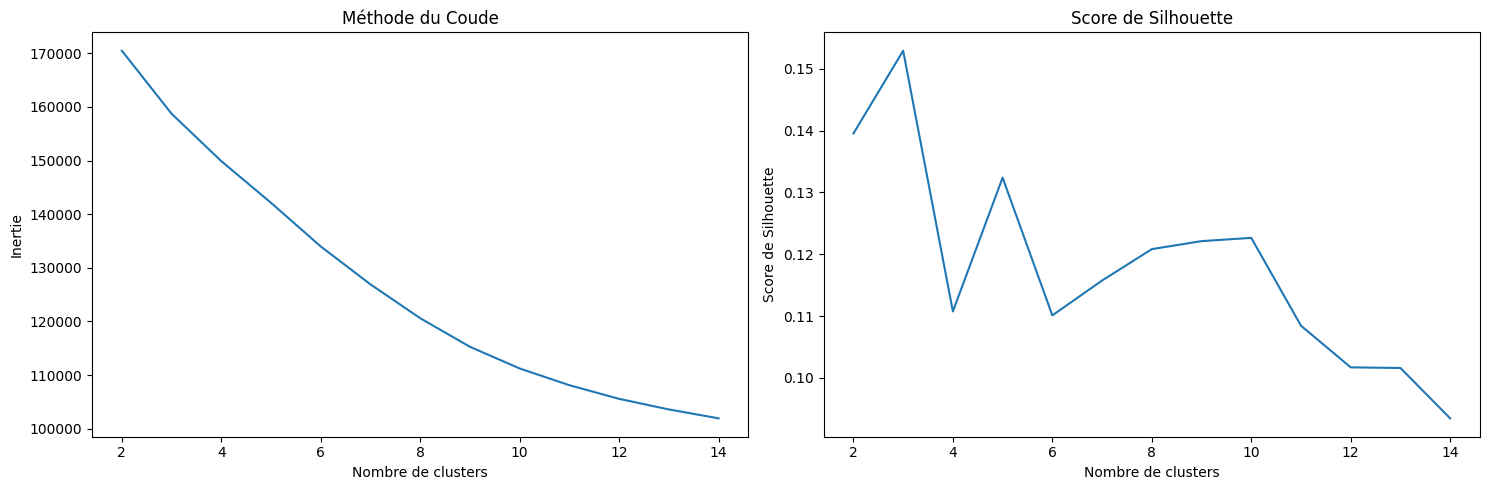

Statistiques descriptives - cluster 1:
          explicit   popularity  num_artists  num_available_markets  \
mean      0.148815     0.361758    -0.286814              -0.031736   
50%       0.000000     0.528013    -0.286814               0.326188   
std       0.355931     0.896363     0.000000               1.042778   
count  7217.000000  7217.000000  7217.000000            7217.000000   
var       0.126687     0.803467     0.000000               1.087385   

       duration_ms          key         mode  time_signature  acousticness  \
mean      0.163261     0.016402    -0.093221        0.148043     -0.472509   
50%       0.041498    -0.073143     0.628977        0.191151     -0.700483   
std       0.974100     1.006722     1.039729        0.586184      0.562246   
count  7217.000000  7217.000000  7217.000000     7217.000000   7217.000000   
var       0.948871     1.013488     1.081036        0.343612      0.316121   

       danceability       energy  instrumentalness     liveness  

In [3]:
# CODE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def kmeans_clustering_analysis(df):
    inertia = []; silhouette_scores = []
    k_range = range(2, 15)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(df, kmeans.labels_))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(k_range, inertia)
    ax1.set_xlabel('Nombre de clusters')
    ax1.set_ylabel('Inertie')
    ax1.set_title('Méthode du Coude')
    ax2.plot(k_range, silhouette_scores)
    ax2.set_xlabel('Nombre de clusters')
    ax2.set_ylabel('Score de Silhouette')
    ax2.set_title('Score de Silhouette')
    plt.tight_layout()
    plt.show()

def cluster_descriptive_stats(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    df_with_clusters = df.copy()
    df_with_clusters['cluster'] = kmeans.fit_predict(df_with_clusters)
    for i in range(n_clusters):
        cluster = df_with_clusters[df_with_clusters['cluster'] == i].drop(columns=['cluster'])
        stats = cluster.describe().loc[['mean', '50%', 'std', 'count']]
        variance = pd.DataFrame(cluster.var()).T
        variance.index = ['var']
        stats = pd.concat([stats, variance])
        print(f"Statistiques descriptives - cluster {i+1}:")
        print(stats)
        print("\n")

kmeans_clustering_analysis(df_normalized)
cluster_descriptive_stats(df_normalized, 3)

### Q4 - Réduction de la dimensionnalité et sélection des caractéristiques/Reducing dimension and selecting features **(2.5 pt)**

##### Lors d'un clustering avec de nombreuses caractéristiques, comme c'est le cas dans ce TP, deux techniques peuvent être utilisées : la **réduction de la dimensionnalité** et/ou la **sélection des caractéristiques**. Ces techniques améliorent les résultats du clustering en réduisant le bruit et en se concentrant sur les données les plus pertinentes, ce qui conduit à des regroupements plus clairs et plus significatifs.

- On utilise la réduction de dimension avec PCA.

##### Dans cette question, vous devez créer une méthode pour réduire les dimensions ou sélectionner les meilleures caractéristiques de l'ensemble de données. Vous êtes libre d'utiliser l'une ou l'autre de ces techniques, ou les deux. Vos résultats seront évalués sur la base de vos métriques, et non sur l'utilisation des deux techniques.

##### Après, regroupez les données en utilisant à nouveau K-Means, en employant les mêmes métriques que celles de la Q3. Enfin, rédigez une évaluation textuelle des différences trouvées.

- Pour les graphiques, la méthode du coude montre peu de différences entre l’avant et l’après PCA, ce qui signifie que la réduction de dimension n’a pas apporté de clarté supplémentaire sur le nombre optimal de clusters. Par contre, on remarque que le score de silhouette est globalement plus bas après PCA, indiquant une légère diminution de la qualité de la séparation des clusters. Cette baisse s'explique par la perte d'informations spécifiques aux caractéristiques d'origine, bien que la majeure partie de la variance ait été conservée.

- Au niveau des clusters, on voit avant PCA que les clusters sont mieux définis et plus interprétables car ils sont basés directement sur les caractéristiques d'origine, facilitant ainsi leur compréhension. Après PCA, les clusters sont définis par des composantes principales, qui sont des combinaisons linéaires des attributs d'origine et ne sont donc plus directement interprétables individuellement. Cette transformation rend plus complexe l'attribution d'un sens précis aux clusters, bien qu'elle simplifie le modèle et accélère le calcul.

- Dans l’ensemble, les écarts types et les variances des clusters restent relativement constants après PCA, avec de légères augmentations dans certains cas. Cela indique que PCA a bien conservé l’homogénéité des clusters, même s’il y a une petite perte de cohésion, notamment dans le premier cluster.

Nombre de composantes retenues après PCA : 14


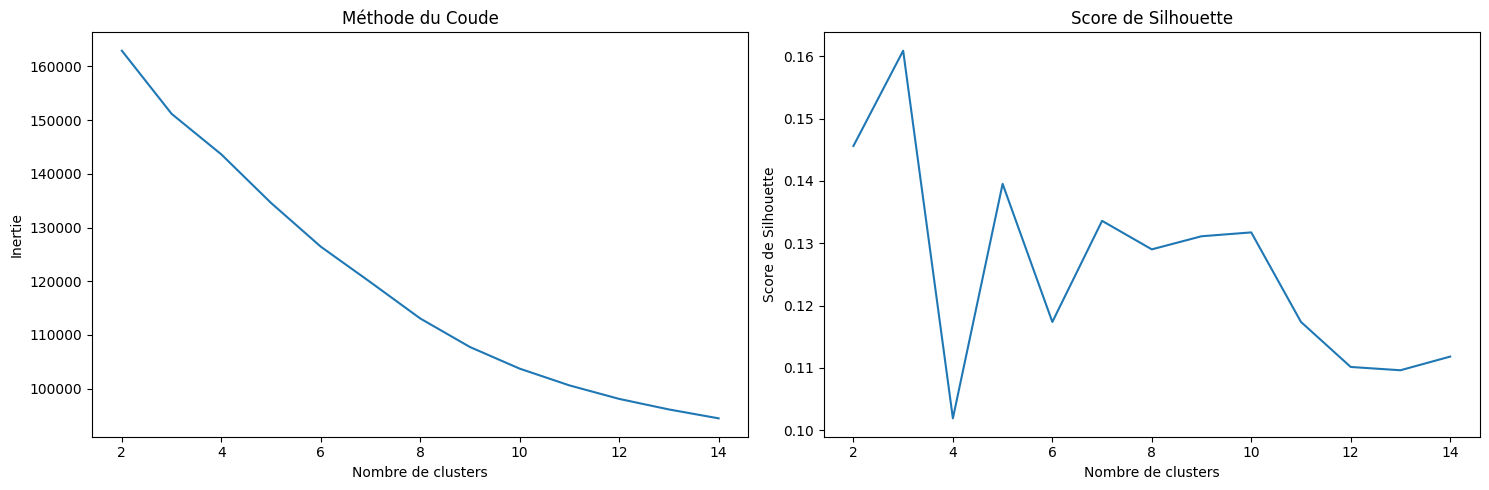

Statistiques descriptives - cluster 1:
               PC1          PC2          PC3          PC4          PC5  \
mean      0.899688    -0.165049     0.167537    -0.277068     0.060377   
50%       0.891702    -0.123133     0.240119    -0.436758     0.001424   
std       0.806372     1.156248     1.097233     0.883537     1.032982   
count  7264.000000  7264.000000  7264.000000  7264.000000  7264.000000   
var       0.650236     1.336909     1.203919     0.780637     1.067052   

               PC6          PC7          PC8          PC9         PC10  \
mean     -0.031502    -0.115679     0.042357     0.094091    -0.123794   
50%      -0.086192    -0.051593     0.094777    -0.008029    -0.094419   
std       0.908286     0.965062     0.960298     0.760177     0.767846   
count  7264.000000  7264.000000  7264.000000  7264.000000  7264.000000   
var       0.824983     0.931344     0.922173     0.577869     0.589588   

              PC11         PC12         PC13         PC14  
mean      0

In [4]:
### CODE
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
df_pca = pd.DataFrame(pca.fit_transform(df_normalized), columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print(f"Nombre de composantes retenues après PCA : {pca.n_components_}")

kmeans_clustering_analysis(df_pca)
cluster_descriptive_stats(df_pca, 3)

## Partie 2 - Analyse de clustering/Clustering analysis

### Q5 - Évaluer les changements dans la musique avec l'analyse des centroïdes/Evaluating the Changes in Music Using Centroid Analysis **(4 pt)**

##### Une autre technique largement utilisée en matière de clustering est l'**analyse centroïde**. L'analyse centroïde est utile pour interpréter les résultats des clusters, car elle révèle les tendances centrales des regroupements et met en évidence les principales caractéristiques et différences entre les groupes.

##### Vous allez maintenant travailler en tant que scientifique des données, en utilisant l'analyse centroïde pour examiner l'ensemble de données musicales. Vous devez diviser l'ensemble de données sur les hits en fonction des valeurs *release_date* suivantes:

1) De 1995 à 2000  
2) De 2001 à 2010  
3) De 2011 à 2019  

##### Rédigez ensuite une évaluation de l'évolution de la musique sur ces trois tranches temporelles. Vous devriez utiliser l'analyse des centroïdes pour suivre le mouvement des centroïdes des clusters K-Means au fil du temps, ce qui peut indiquer des changements dans les tendances musicales.

- On observe l'évolution de deux combos de caractéristiques : Danceability & Energy, qui permet de mesurer le rythme et l’intensité des morceaux pour observer les tendances dans les genres orientés vers la danse, et Loudness & Energy, où le loudness reflète l’évolution des techniques de production.

- 1995-2000 : on voit que danceability est relativement élevée, mais energy reste modérée à négative, indiquant des rythmes dansants sans grande intensité. Le loudness et l’energy négatifs montrent une production sonore plus douce et modérée. Ces résultats reflètent assez bien les tendances pop et hip-hop des années 90, où l’accent n’était pas encore mis sur les sons forts et intenses.

- 2001-2010 : on voit que la danceability et l’energy augmentent, reflétant la popularité croissante des genres comme l’électro et la pop, avec des beats plus intenses. Le loudness suit cette tendance, montrant une production plus intense et accrocheuse. Ça marque une transition vers une musique plus festive et énergique, influencée par la culture de danse et l’électro.

- 2011-2019 : on voit que la danceability reste élevée, mais l’energy connaît une légère baisse, indiquant un changement vers des genres plus mélodiques, comme la pop douce. Le loudness continue d’augmenter, bien que l’energy soit plus équilibrée. Ça montre une diversification des genres, avec un son fort mais une intensité plus douce, créant une ambiance accrocheuse sans être trop agressive.

##### Conseil (non obligatoire): Sélectionnez deux caractéristiques et suivez leurs centroïdes pour observer leur évolution. Toutefois, les approches créatives sont vivement encouragées.

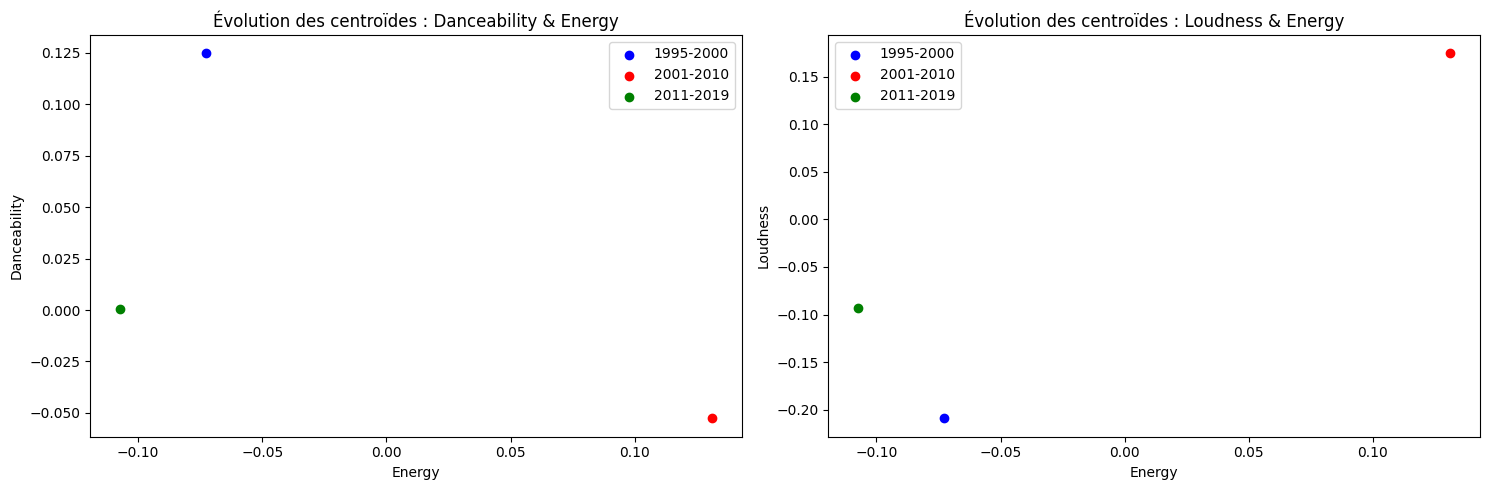

In [5]:
### CODE
df_normalized['release_date'] = df['release_date']
data_1995_2000 = df_normalized[(df_normalized['release_date'] >= '1995-01-01') & (df_normalized['release_date'] <= '2000-12-31')]
data_2001_2010 = df_normalized[(df_normalized['release_date'] >= '2001-01-01') & (df_normalized['release_date'] <= '2010-12-31')]
data_2011_2019 = df_normalized[(df_normalized['release_date'] >= '2011-01-01') & (df_normalized['release_date'] <= '2019-12-31')]

centroid_1995_2000_de = data_1995_2000[['danceability', 'energy']].mean()
centroid_2001_2010_de = data_2001_2010[['danceability', 'energy']].mean()
centroid_2011_2019_de = data_2011_2019[['danceability', 'energy']].mean()

centroid_1995_2000_le = data_1995_2000[['loudness', 'energy']].mean()
centroid_2001_2010_le = data_2001_2010[['loudness', 'energy']].mean()
centroid_2011_2019_le = data_2011_2019[['loudness', 'energy']].mean()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].scatter(centroid_1995_2000_de['energy'], centroid_1995_2000_de['danceability'], color='blue', label='1995-2000')
axs[0].scatter(centroid_2001_2010_de['energy'], centroid_2001_2010_de['danceability'], color='red', label='2001-2010')
axs[0].scatter(centroid_2011_2019_de['energy'], centroid_2011_2019_de['danceability'], color='green', label='2011-2019')
axs[0].set_xlabel('Energy')
axs[0].set_ylabel('Danceability')
axs[0].set_title("Évolution des centroïdes : Danceability & Energy")
axs[0].legend()
axs[1].scatter(centroid_1995_2000_le['energy'], centroid_1995_2000_le['loudness'], color='blue', label='1995-2000')
axs[1].scatter(centroid_2001_2010_le['energy'], centroid_2001_2010_le['loudness'], color='red', label='2001-2010')
axs[1].scatter(centroid_2011_2019_le['energy'], centroid_2011_2019_le['loudness'], color='green', label='2011-2019')
axs[1].set_xlabel('Energy')
axs[1].set_ylabel('Loudness')
axs[1].set_title("Évolution des centroïdes : Loudness & Energy")
axs[1].legend()
plt.tight_layout()
plt.show()


### Q6 - Analyse des valeurs aberrantes avec DBSCAN/Analyzing outliers using DBSCAN **(2.5 pts)**

##### **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) est un algorithme de clustering qui regroupe les points en fonction de leur densité dans l'espace. Il identifie les points centraux, c'est-à-dire ceux qui ont un nombre minimum de points voisins à une certaine distance (*epsilon*). Ces points centraux forment le centre d'un cluster, et tous les points voisins situés à moins de *epsilon* sont affectés à ce cluster.

##### Une caractéristique importante de DBSCAN est sa capacité à identifier les valeurs aberrantes potentielles. Cette analyse est cruciale pour identifier les chansons qui diffèrent significativement des autres.

##### Dans cette question, vous allez regrouper les données à l'aide de DBSCAN. Tracez les données résultantes à l'aide d'une technique de réduction de la dimensionnalité. Ensuite, sélectionnez trois points aberrants et rédigez une analyse expliquant pourquoi ils sont considérés comme aberrants. La valeur *epsilon* est-elle importante pour identifier ces valeurs aberrantes?

- Ces points sont considérés comme aberrants car leurs valeurs dans plusieurs dimensions diffèrent significativement de celles des autres, ce qui les place hors des zones de haute densité définies par DBSCAN. Point 1 : Ce point se distingue de la densité moyenne du cluster principal. Bien que ses valeurs pour les composantes principales PC1 et PC2 ne soient pas particulièrement extrêmes, d'autres composantes, comme PC5 (-1.744615), s'écartent des valeurs typiques des clusters denses. Point 2 : Ce point présente une combinaison unique de valeurs qui est peu fréquente parmi les autres données. Par exemple, sa composante PC11 (0.309744) est éloignée par rapport aux autres points. Ces petites différences cumulées sur plusieurs composantes principales font que ce point se retrouve isolé des clusters denses. Point 3 : Ce point se distingue de manière plus marquée dans la dimension PC1, où il possède une valeur élevée (2.759415), le différenciant clairement de la majorité des autres données. En plus de cela, des valeurs importantes dans PC10 et PC12 renforcent son caractère d’anomalie par rapport aux autres clusters.

- Comme l'illustre le graphique des valeurs aberrantes en fonction de epsilon, la détection des anomalies dépend fortement de cette valeur. Lorsque epsilon est petit (entre 0 et 1), le nombre de points détectés comme aberrants est élevé, car les clusters sont définis de manière étroite, laissant de nombreux points en dehors des zones de densité suffisante. À mesure que epsilon augmente, le nombre de points aberrants diminue progressivement, car DBSCAN commence à inclure davantage de points dans les clusters existants. Ainsi, le choix de epsilon est important car un epsilon trop petit entraîne un nombre élevé de points aberrants, tandis qu’un epsilon trop grand intègre des points potentiellement aberrants aux clusters, réduisant la capacité de DBSCAN à détecter efficacement les anomalies.

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.991445 -0.867603 -0.576194 -1.090625 -1.885812 -0.309797  0.460247   
1  0.503145 -0.386615 -0.558197 -1.004061 -0.952470 -0.968758  0.981099   
2  2.814467 -0.782925 -1.309283 -0.720872 -0.002256 -0.117738  1.260397   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.621916  0.354538 -0.432661 -0.490238  0.561931  0.975705 -0.036664   
1 -0.013639  0.791424  0.060434  0.383478  0.580862  1.668430 -0.045440   
2 -0.006977  0.934151 -0.314597  1.770993  1.124795  0.700303  0.292930   

   dbscan_cluster  
0              -1  
1              -1  
2              -1  


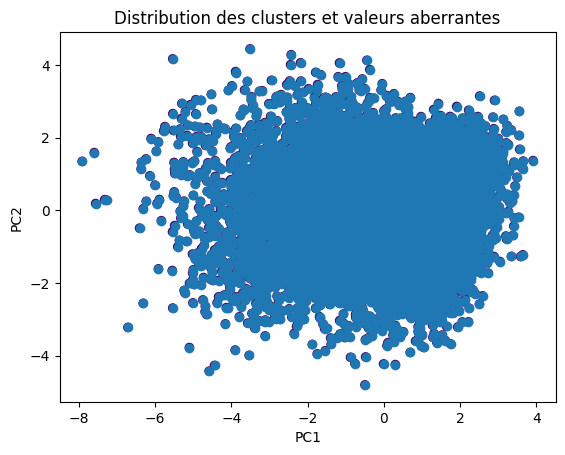

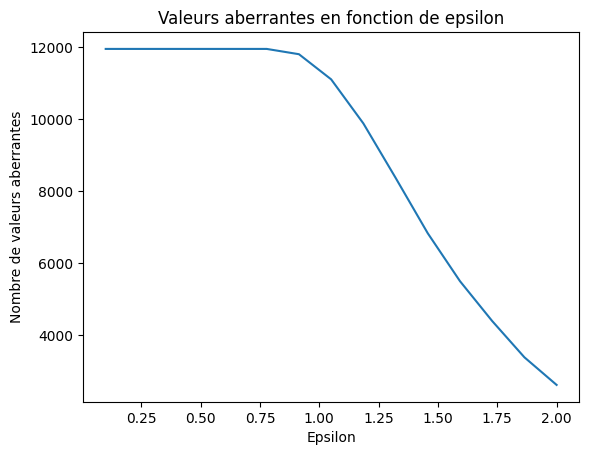

In [6]:
### CODE
import numpy as np
from sklearn.cluster import DBSCAN

df_normalized = df_normalized.drop(columns=['release_date'])

dbscan = DBSCAN(eps=0.5)
clusters = dbscan.fit_predict(df_normalized)
df_normalized['dbscan_cluster'] = clusters

pca = PCA(n_components=0.95)
df_pca = pd.DataFrame(pca.fit_transform(df_normalized), columns=[f'PC{i+1}' for i in range(pca.n_components_)])
df_pca['dbscan_cluster'] = clusters

outliers = df_pca[df_pca['dbscan_cluster'] == -1]
print(outliers.head(3))

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['dbscan_cluster'])
plt.scatter(outliers['PC1'], outliers['PC2'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Distribution des clusters et valeurs aberrantes")
plt.show()

def epsilon_sensitivity(df, eps_values):
    outlier_counts = []
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps)
        clusters = dbscan.fit_predict(df.drop(columns=['dbscan_cluster']))
        outliers = sum(clusters == -1)
        outlier_counts.append(outliers)
    plt.plot(eps_values, outlier_counts)
    plt.xlabel('Epsilon')
    plt.ylabel("Nombre de valeurs aberrantes")
    plt.title("Valeurs aberrantes en fonction de epsilon")
    plt.show()
    
eps_values = np.linspace(0.1, 2.0, 15)
epsilon_sensitivity(df_normalized, eps_values)

### Q7 - Analyser les groupes avec le clustering hiérarchique/Analyzing groups with hierarchial clustering **(2.5 pts)**

##### **Le clustering hiérarchique** est une méthode de clustering sur la base d'une hiérarchie ou d'une structure arborescente. Elle construit des clusters imbriquées en fusionnant des clusters plus petits (approche agglomérative) ou en divisant des clusters plus grands (approche divisive). Le processus se poursuit jusqu'à ce que tous les points de données se trouvent dans un seul cluster ou que chaque point de données constitue son propre cluster.

##### Ce type de regroupement est très utile pour analyser les hiérarchies qui en résultent. Vous pouvez utiliser cette méthode pour examiner les relations entre les clusters et les modèles à plusieurs niveaux qui peuvent ne pas être facilement visibles avec d'autres méthodes.

##### Dans cette question, vous allez regrouper les données en utilisant le clustering hiérarchique avec la méthode de Ward. Toutes les caractéristiques sont-elles utiles dans ce regroupement? Représentez les données obtenues dans un dendrogramme. Rédigez ensuite une analyse des résultats obtenus.

- Le dendrogramme de base montre de nombreux regroupements intermédiaires avec des branches plus courtes, indiquant que les données contiennent plusieurs petites variations. La complexité de la structure reflète potentiellement la présence de caractéristiques non informatives qui introduisent du bruit et rendent difficile l'identification de clusters clairs. Après l'application de PCA, le dendrogramme présente des branches légèrement plus longues et distinctes, indiquant que les clusters sont plus séparés et que la variance entre eux est mieux capturée. Ce résultat suggère que PCA a réussi à capturer l’information la plus pertinente, permettant une séparation plus claire et plus interprétable des clusters. En effet, dans le dendrogramme avant PCA, les regroupements apparaissent plus denses et de nombreux clusters semblent se former à des niveaux de distance intermédiaires, rendant la structure moins claire, alors que dans le dendrogramme après PCA, la structure semble simplifiée.

- En conclusion, le fait que le dendrogramme soit légèrement plus clair et lisible après l’application de PCA indique que toutes les caractéristiques ne sont pas nécessairement utiles dans ce regroupement.

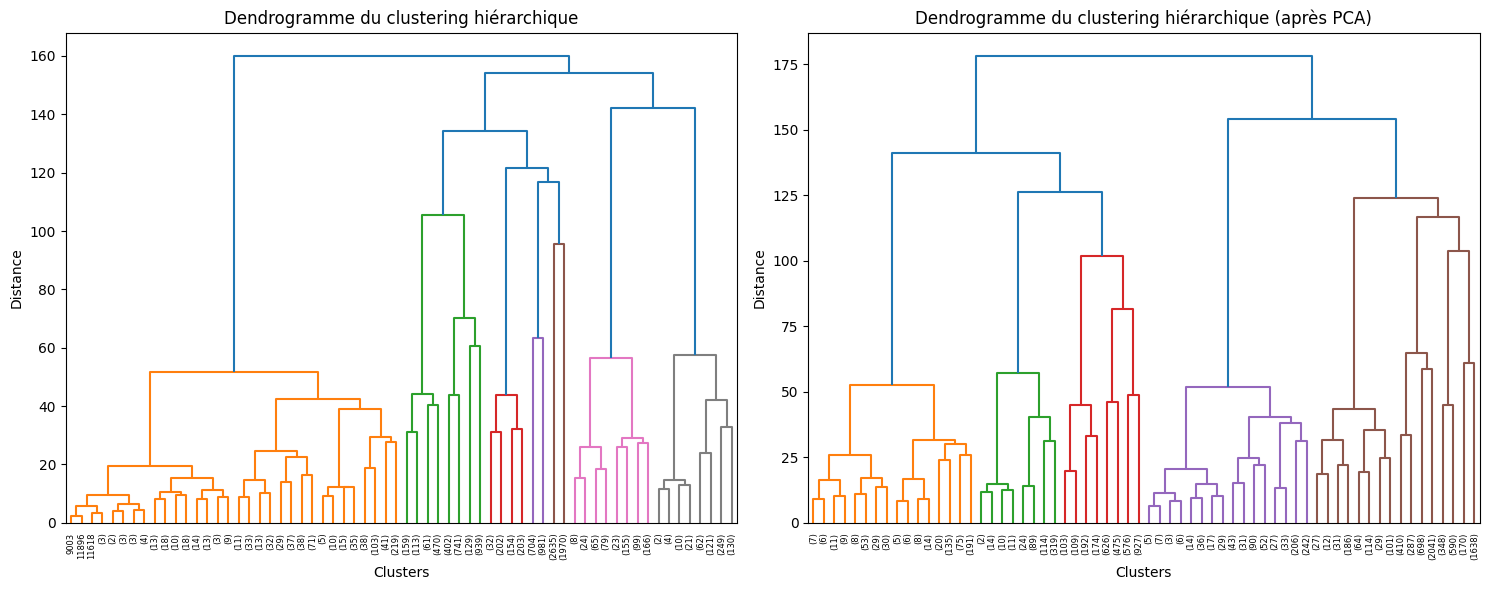

In [7]:
### CODE
from scipy.cluster.hierarchy import dendrogram, linkage

df_normalized = df_normalized.drop(columns=['dbscan_cluster'])
df_pca = df_pca.drop(columns=['dbscan_cluster'])

Z = linkage(df_normalized, method='ward')
Z_pca = linkage(df_pca, method='ward')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
dendrogram(Z, truncate_mode='level', p=5, ax=axes[0])
axes[0].set_title('Dendrogramme du clustering hiérarchique')
axes[0].set_xlabel('Clusters')
axes[0].set_ylabel('Distance')
dendrogram(Z_pca, truncate_mode='level', p=5, ax=axes[1])
axes[1].set_title('Dendrogramme du clustering hiérarchique (après PCA)')
axes[1].set_xlabel('Clusters')
axes[1].set_ylabel('Distance')
plt.tight_layout()
plt.show()

## Partie 3 - Systèmes de recommandation avec clustering/Recommendation systems using clustering

### Q8 - Recommander des chansons/Recommending Songs **(4 pt)**

#### **Les systèmes de recommandation** sont des algorithmes conçus pour suggérer des éléments pertinents aux utilisateurs en fonction de leurs préférences, de leur comportement ou de leurs interactions passées. Ils jouent un rôle crucial dans le filtrage de grandes quantités de données, en fournissant des recommandations personnalisées pour chaque utilisateur.

#### Dans cette question, vous devez construire un système de recommandation en utilisant le clustering. En utilisant la technique de votre choix, trouvez les meilleures suggestions musicales pour les chansons suivantes. Cependant, utilisez l'ensemble de données complet, *TP2_nonhits.csv*, pour cette tâche.  Vous pouvez télécharger le jeu de données ici: https://1drv.ms/f/s!AokVPhU6GPPQkv4NipxQg8IFaeRN6w.

1) Id 3 - Ariana Grande, *Fake Smile*
2) Id 13252 - Kanye West, *All of the Lights*
3) Id 284228 - Metallica, *Nothing Else Matters*
4) Id 386296 - Céline Dion, *Pour que tu m'aimes encore*  
5) Id 511119 - Aerosmith, *Dream On*  

#### Comme d'habitude, fournissez une analyse écrite de vos résultats. Toutes les caractéristiques sont-elles utiles? Existe-t-il une technique de clustering plus efficace pour construire un système de recommandation? Est-ce qu'il y a des caractéristiques mieux adaptées pour indiquer différents styles, différents artistes?

- Globalement, le système de recommandation parvient à identifier des similarités de base en s’appuyant sur certaines caractéristiques musicales globales. Cependant, il montre des limites en matière de différenciation des genres, ce qui peut entraîner des suggestions éloignées des attentes de l’audience cible. En effet, chaque artiste possède un style distinct, et les recommandations tendent parfois à s’écarter de leur catégorie musicale.

    - Recommendations pour Id 3 - Ariana Grande, Fake Smile : Malgré l’identification du style pop, les suggestions incluent des genres éloignés comme le rock alternatif et le country. Par exemple, "Pills, Demons & Etc." de Velvet Revolver et "Diggin' up Bones" de Randy Travis ne reflètent pas bien le style pop émotionnel de l’artiste.
    - Recommendations pour Id 13252 - Kanye West, All of the Lights : Les recommandations possèdent des caractéristiques globales similaires mais manquent de l’énergie et du dynamisme propres au style de Kanye West. "Running Scared" et "Be My Baby" de Linda Ronstadt, bien qu'ayant un ton émotionnel, n'atteignent pas le niveau de dynamisme recherché.
    - Recommendations pour Id 284228 - Metallica, Nothing Else Matters : Bien que le genre rock soit détecté, les suggestions manquent de spécificité dans le sous-genre. Par exemple, "Woman, Woman - Reprise" de Johnny Bristol et "I Remember - Live" de Ms. Lauryn Hill s'éloignent du métal et incluent un rock plus léger, ce qui dilue l'essence du morceau original.
    - Recommendations pour Id 386296 - Céline Dion, Pour que tu m'aimes encore : Les recommandations capturent en partie l’intensité émotionnelle, mais certaines comme "Album End" d'Alien Ant Farm et "Mirror Mirror" de LL Cool J n’ont pas le style doux et romantique propre à Céline Dion.
    - Recommendations pour Id 511119 - Aerosmith, Dream On : Le système reconnaît en partie le rock classique, mais ne distingue pas les sous-genres. Des morceaux comme "Woman, Woman - Reprise" de Johnny Bristol et "I Remember - Live" de Ms. Lauryn Hill, orientés vers un rock plus doux, manquent la puissance et l'intensité classiques d’Aerosmith.

- Comme on a vu dans l'analyse des hits, certaines caractéristiques se révèlent plus pertinentes que d'autres pour différencier les styles et répondre aux préférences musicales. En effet, certaines caractéristiques (ex : key, mode, time_signature) semblent moins influentes pour capter les préférences générales de style ou d’artiste. Pour cette partie, nous avons donc également utilisé PCA afin de réduire les dimensions moins pertinentes et d’améliorer la cohérence des recommandations. Cette approche aide à éliminer certaines caractéristiques moins influentes.

- K-Means avec PCA est une technique efficace pour capturer des différences globales dans un dataset de grande dimension, comme le nôtre, car elle est rapide et permet de créer des clusters bien définis. Cependant, avec PCA, certaines informations spécifiques aux chansons ont été perdues, ce qui a conduit à des recommandations de genres variés. De plus, K-Means place toutes les chansons dans des clusters, y compris les valeurs aberrantes, ce qui a parfois produit des recommandations moins intuitives. Étant donné que nous sommes passés d’un dataset d’environ 11 000 valeurs à près de 900 000, le temps requis pour déterminer le nombre optimal de clusters était trop long, bien que cela aurait pu améliorer les recommandations. Nous avons donc fixé le nombre de clusters à 20 pour obtenir des groupes plus petits et des recommandations plus ciblées. Bien que des alternatives comme DBSCAN et l’analyse hiérarchique puissent offrir des recommandations plus précises, elles demandent beaucoup plus de temps de calcul. Lors de nos tests, DBSCAN a montré des recommandations légèrement plus spécifiques, car il capte mieux les relations locales et gère les valeurs aberrantes, mais nous avons finalement écarté cette méthode en raison de son temps de calcul élevé.

- Pour une meilleure différenciation des styles et des artistes, il est recommandé de prioriser des caractéristiques comme le tempo, la danceability, la valence, et l'acousticness. Nous avons constaté que ces attributs favorisaient davantage la séparation en clusters car ils reflètent directement les aspects émotionnels et rythmiques d’un morceau, qui jouent un rôle clé dans la perception et l’expérience musicale des auditeurs. Ces caractéristiques influencent fortement la manière dont les chansons sont perçues en termes d'ambiance et de genre, permettant de regrouper plus naturellement des morceaux similaires et de produire des recommandations plus cohérentes.

In [53]:
### CODE
df = pd.read_csv('TP2_nonhits.csv', delimiter=';', low_memory=False)
df.head()

,song_id,song_name,name_artists,popularity,explicit,song_type,num_artists,num_available_markets,release_date,duration_ms,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0,needy,['Ariana Grande'],76,True,Solo,1,79,2019-02-08,171573,...,4,0.78,0.647,0.309,7.41e-06,0.202,-7.948,0.0366,0.195,87.045
1,1,NASA,['Ariana Grande'],76,False,Solo,1,79,2019-02-08,182000,...,4,0.451,0.747,0.458,0,0.252,-6.891,0.303,0.47,75.029
2,2,bloodline,['Ariana Grande'],74,True,Solo,1,79,2019-02-08,216893,...,4,0.0815,0.758,0.665,0.000157,0.216,-5.188,0.0774,0.643,151.976
3,3,fake smile,['Ariana Grande'],73,True,Solo,1,79,2019-02-08,208880,...,4,0.329,0.45,0.619,0,0.319,-7.412,0.372,0.427,83.3
4,4,bad idea,['Ariana Grande'],74,False,Solo,1,79,2019-02-08,267107,...,4,0.0268,0.847,0.579,0.0545,0.102,-5.314,0.0719,0.569,137.998


In [54]:
df_nonhits = df.drop(columns=['song_name', 'name_artists', 'release_date'])
df_nonhits['explicit'] = df_nonhits['explicit'].astype(int)
numerical_columns = [
    'duration_ms', 'key', 'mode', 'time_signature',
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'valence', 'tempo'
]
df_nonhits[numerical_columns] = df_nonhits[numerical_columns].apply(pd.to_numeric, errors='coerce')

categorical_cols = df_nonhits.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(df_nonhits[categorical_cols])
df_encoded = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

numerical_cols = df_nonhits.select_dtypes(exclude=['object']).columns.drop(['explicit'])
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df_nonhits[numerical_cols])
df_scaled = pd.DataFrame(scaled_numerical, columns=numerical_cols)

df_nonhits_normalized = pd.concat([df_nonhits[['explicit']].reset_index(drop=True), df_scaled, df_encoded], axis=1)
df_nonhits_normalized = df_normalized.fillna(df_normalized.mean())
df_nonhits_normalized.head()

,explicit,song_id,popularity,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,song_type_Solo
0,1,-1.732049,5.645966,-0.299158,0.375298,-0.601018,0.505150,-1.548946,0.231003,1.364988,0.378975,-1.045493,-0.682629,-0.024999,0.434325,-0.381116,-1.227120,-1.128802,1.0
1,0,-1.732045,5.645966,-0.299158,0.375298,-0.492944,0.222913,0.645600,0.231003,0.370702,0.983012,-0.420891,-0.682649,0.232677,0.661677,2.077781,-0.167265,-1.535458,1.0
2,1,-1.732041,5.482264,-0.299158,0.375298,-0.131284,-0.906035,-1.548946,0.231003,-0.745981,1.049456,0.446844,-0.682223,0.047151,1.027978,-0.004528,0.499480,1.068646,1.0
3,1,-1.732037,5.400413,-0.299158,0.375298,-0.214337,1.069624,0.645600,0.231003,0.002000,-0.810979,0.254014,-0.682649,0.577961,0.549614,2.714657,-0.332988,-1.255544,1.0
4,0,-1.732033,5.482264,-0.299158,0.375298,0.389175,-1.188272,0.645600,0.231003,-0.911293,1.587050,0.086336,-0.534735,-0.540349,1.000877,-0.055294,0.214283,0.595591,1.0


In [52]:
df_nonhits_pca = pd.DataFrame(pca.fit_transform(df_nonhits_normalized), columns=[f'PC{i+1}' for i in range(pca.n_components_)])

kmeans = KMeans(n_clusters=20, init='k-means++', random_state=42, n_init=10)
df_nonhits_pca['cluster'] = kmeans.fit_predict(df_nonhits_pca)

df_nonhits_pca['song_id'] = df['song_id']
df_nonhits_pca['song_name'] = df['song_name']
df_nonhits_pca['name_artists'] = df['name_artists']

def get_recommendations(song_id, num_recommendations=5):
    target_cluster = df_nonhits_pca[df_nonhits_pca['song_id'] == song_id]['cluster'].values[0]
    cluster_songs = df_nonhits_pca[(df_nonhits_pca['cluster'] == target_cluster) & (df_nonhits_pca['song_id'] != song_id)]
    recommendations = cluster_songs[['song_name', 'name_artists']].sample(n=num_recommendations, random_state=42)
    return recommendations

songs_to_recommend = {
    3: "Ariana Grande, Fake Smile", 
    13252: "Kanye West, All of the Lights", 
    284228: "Metallica, Nothing Else Matters", 
    386296: "Céline Dion, Pour que tu m'aimes encore", 
    511119: "Aerosmith, Dream On"
}

for song_id, song_name in songs_to_recommend.items():
    print(f"\nRecommendations pour Id {song_id} - {song_name}")
    print(get_recommendations(song_id, 5))


Recommendations pour Id 3 - Ariana Grande, Fake Smile
                                                song_name         name_artists
472389                               Pills, Demons & Etc.  ['Velvet Revolver']
283779                                        Without You   ['The Piano Guys']
494949                                   Diggin' up Bones     ['Randy Travis']
867628  Where You Belong - From "Fifty Shades Of Grey"...       ['The Weeknd']
889203                                    BORN IN THE USA    ['American Boys']

Recommendations pour Id 13252 - Kanye West, All of the Lights
                                                song_name  \
423746  Running Scared (Originally Performed By Roy Or...   
364990                                       El Relicario   
883331                                         Be My Baby   
542189                                          All Of Me   
355257  Kind of Woman (Karaoke Version) [Originally Pe...   

                         name_artists  
4